In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from combat.pycombat import pycombat

In [3]:
df_surv_lab = pd.read_csv('../data/Survival_labels.csv', index_col=[0], header=[0])
df_surv_lab

,Surv_label
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1
TCGA-E2-A109-01;TCGA,0


In [10]:
all_studies_dict = df_surv_lab.groupby('Surv_label').size().to_dict()
all_stdies_df = pd.DataFrame([all_studies_dict], index=['All studies'])
all_stdies_df_ = all_stdies_df.rename({0: '< 5 years', 1: '>= 5 years'}, axis='columns')

In [13]:
all_stdies_df_

,< 5 years,>= 5 years
All studies,1437,2692


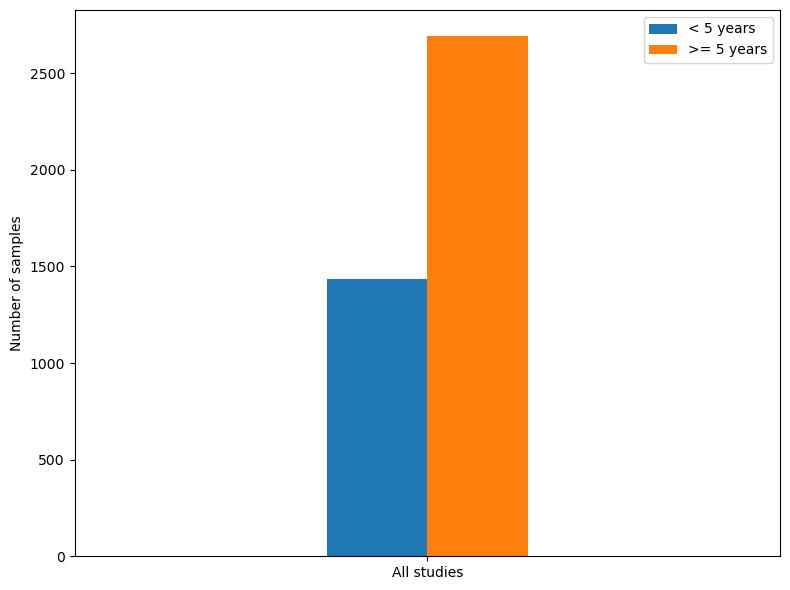

In [23]:
fig, ax= plt.subplots(1,1, figsize=(8,6))
y = [1437, 2692]
bars = all_stdies_df_.plot.bar(ax=ax, rot=0, width=0.2)
# ax.set_xlabel('Studies')
ax.set_ylabel('Number of samples')
# ax.set_xticklabels('all studies', ax.get_xticks(), rotation = -90)
fig.tight_layout()

# for i, value in enumerate(y):
#     ax.text(value + 1, i, str(value))

fig.show()

In [ ]:
Desmedt-June07, Hatzis-Pusztai, METABRIC, Miller, Minn, Pawitan, Schmidt, Symmans, TCGA, WangY, WangY-ErasmusMC, Zhang 


In [4]:
paw_df = df_surv_lab[df_surv_lab.index.str.contains('Pawitan')]
des_df = df_surv_lab[df_surv_lab.index.str.contains('Desmedt-June07')]
hat_df = df_surv_lab[df_surv_lab.index.str.contains('Hatzis-Pusztai')]
met_df = df_surv_lab[df_surv_lab.index.str.contains('METABRIC')]
sch_df = df_surv_lab[df_surv_lab.index.str.contains('Schmidt')]
sym_df = df_surv_lab[df_surv_lab.index.str.contains('Symmans')]
tcga_df = df_surv_lab[df_surv_lab.index.str.contains('TCGA')]
wangy_df = df_surv_lab[df_surv_lab.index.str.endswith('WangY')]
wangyemc_df = df_surv_lab[df_surv_lab.index.str.contains('WangY-ErasmusMC')]
zh_df = df_surv_lab[df_surv_lab.index.str.contains('Zhang')]
mil_df = df_surv_lab[df_surv_lab.index.str.contains('Miller')]
min_df = df_surv_lab[df_surv_lab.index.str.contains('Minn')]
print(len(paw_df), len(des_df), len(hat_df), len(met_df), len(sch_df), len(sym_df), len(tcga_df), len(wangy_df), len(wangyemc_df), 
      len(zh_df), len(mil_df), len(min_df))

147 183 150 1981 169 224 532 52 257 121 89 65


In [5]:
paw_dict = paw_df.groupby('Surv_label').size().to_dict()
des_dict = des_df.groupby('Surv_label').size().to_dict()
hat_dict = hat_df.groupby('Surv_label').size().to_dict()
met_dict = met_df.groupby('Surv_label').size().to_dict()
sch_dict = sch_df.groupby('Surv_label').size().to_dict()
sym_dict = sym_df.groupby('Surv_label').size().to_dict()
tcga_dict = tcga_df.groupby('Surv_label').size().to_dict()
wangy_dict = wangy_df.groupby('Surv_label').size().to_dict()
wangyemc_dict = wangyemc_df.groupby('Surv_label').size().to_dict()
zh_dict = zh_df.groupby('Surv_label').size().to_dict()
mil_dict = mil_df.groupby('Surv_label').size().to_dict()
min_dict = min_df.groupby('Surv_label').size().to_dict()

list_of_dict = [des_dict, hat_dict, met_dict, mil_dict, min_dict, paw_dict, sch_dict, sym_dict, tcga_dict, wangy_dict, wangyemc_dict, zh_dict]

In [6]:
df = pd.DataFrame(
    [des_dict, hat_dict, met_dict, mil_dict, min_dict, paw_dict, sch_dict, sym_dict, tcga_dict, wangy_dict, wangyemc_dict, zh_dict], 
    index=['Desmedt-June07', 'Hatzis-Pusztai', 'METABRIC', 'Miller', 'Minn', 'Pawitan', 'Schmidt', 'Symmans', 'TCGA', 'WangY',
           'WangY-ErasmusMC', 'Zhang'])

df_ = df.rename({0: '< 5 years', 1: '>= 5 years'}, axis='columns')
df_

,< 5 years,>= 5 years
Desmedt-June07,56,127
Hatzis-Pusztai,102,48
METABRIC,635,1346
Miller,21,68
Minn,21,44
Pawitan,32,115
Schmidt,24,145
Symmans,37,187
TCGA,395,137
WangY,10,42


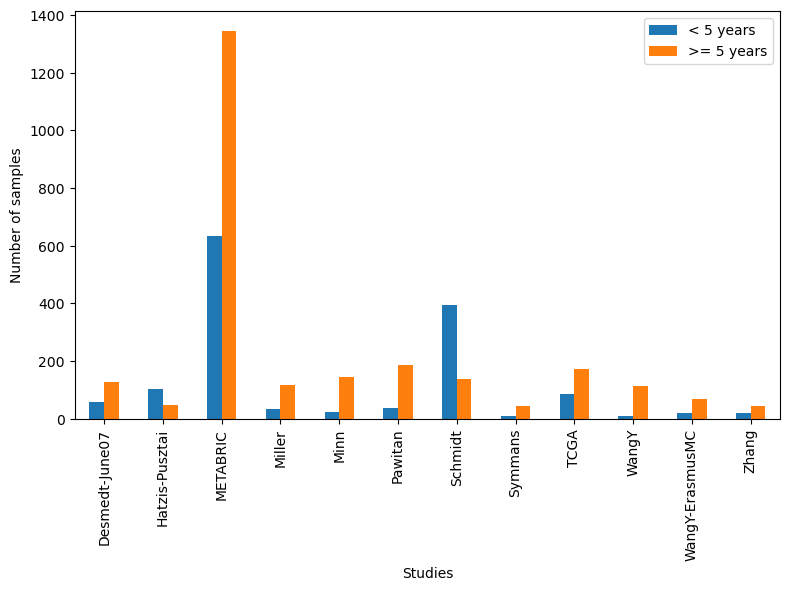

In [22]:
df = pd.DataFrame(
    [des_dict, hat_dict, met_dict, paw_dict, sch_dict, sym_dict, tcga_dict, wangy_dict, wangyemc_dict, zh_dict, mil_dict, min_dict], 
    index=['Desmedt-June07', 'Hatzis-Pusztai', 'METABRIC', 'Miller', 'Minn', 'Pawitan', 'Schmidt', 'Symmans', 'TCGA', 'WangY',
           'WangY-ErasmusMC', 'Zhang'])

df_ = df.rename({0: '< 5 years', 1: '>= 5 years'}, axis='columns')

fig, ax= plt.subplots(1,1, figsize=(8,6))

df_.plot.bar(ax=ax)
ax.set_xlabel('Studies')
ax.set_ylabel('Number of samples')
fig.tight_layout()
fig.show()

In [21]:
df

,0,1
Desmedt-June07,56,127
Hatzis-Pusztai,102,48
METABRIC,635,1346
Miller,32,115
Minn,24,145
Pawitan,37,187
Schmidt,395,137
Symmans,10,42
TCGA,86,171
WangY,9,112


In [ ]:
width = 0.35       # the width of the bars
for surv_dict in list_of_dict:
    
men_means = {'G1': 20, 'G2': 35, 'G3': 30, 'G4': 35, 'G5': 27}
men_std = {'G1': 2, 'G2': 3, 'G3': 4, 'G4': 1, 'G5': 2}

rects1 = plt.bar(men_means.keys(), men_means.values(), -width, align='edge', color='r', label='Men')

women_means = {'G1': 25, 'G2': 32, 'G3': 34, 'G4': 20, 'G5': 25}
women_std = {'G1': 3, 'G2': 5, 'G3': 2, 'G4': 3, 'G5': 3}

rects2 = plt.bar(women_means.keys(), women_means.values(), +width, align='edge',
                yerr=women_std.values(), color='y', label='Women')

# add some text for labels, title and axes ticks
plt.xlabel('Groups')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
studies = ('Pawitan')
data = {'< 5 years':list1}
x = np.arange(len(studies))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

In [1]:
import torch

In [3]:
df_surv_labels = torch.load('../data/new0501/embedding_tensors/full_surv_labels_conf41.pt')
df_surv_labels

tensor([0, 0, 0,  ..., 1, 1, 1])

In [4]:
len(df_surv_labels)

3816

In [5]:
import pandas

In [7]:
df = pd.read_csv('../data/SyNet_bcnew_filtered.csv', index_col=[0], header=[0])
df

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM107072;Pawitan,-0.582361,-0.222353,0.219863,0.026182,-0.288826,-0.161752,-0.240268,-0.338397,-0.279974,0.127352,...,-0.231400,-0.275495,-0.040007,0.052432,-0.244824,0.153909,-0.311117,-0.320173,-0.293408,-0.019703
GSM107073;Pawitan,0.219880,-0.176259,-0.315604,-0.525516,-0.012552,-0.348002,-0.525521,-0.387005,0.081573,-0.105669,...,-0.582385,-0.561617,-0.542628,0.219763,-0.089132,-0.157012,0.263001,-0.633527,-0.666791,0.826854
GSM107074;Pawitan,0.201526,-0.542632,-0.161757,-0.633541,-0.418846,0.002321,-0.666727,0.034622,0.061805,-0.222414,...,-0.137175,-0.910970,0.103650,-0.204346,0.061803,-0.338542,0.071561,-0.367229,-0.387130,-0.407933
GSM107075;Pawitan,-0.116395,-0.441858,-0.105607,-0.152048,-0.533918,0.140318,-0.181055,0.442188,-0.605973,-0.649379,...,-0.333931,-0.235823,-0.372110,-0.137226,-0.320226,-0.821581,-0.083216,-0.231388,0.153969,-0.357531
GSM107076;Pawitan,-0.324742,-0.293312,-0.367200,-0.297712,-0.430122,-0.222351,-0.100147,-0.110979,-0.257950,-0.297748,...,-0.166682,-0.185873,-0.231343,-0.441940,-0.161831,-0.320261,0.115185,-0.377016,-0.542752,-0.094688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,-0.089339,0.234654,-0.157337,0.105114,-0.462905,-0.302237,0.307653,0.159837,-0.429098,0.324689,...,-0.144433,0.060317,-0.397666,-0.446454,0.110893,-0.298547,-0.458003,-0.273207,-0.118523,-0.371729
TCGA-BH-A0B2-01;TCGA,-0.121189,0.100319,-0.145270,0.126344,-0.180611,-0.298981,0.152503,-0.043657,-0.520856,-0.133024,...,-0.256142,-0.119841,-0.263371,-0.687358,-0.216021,-0.262995,-0.262261,0.070956,-0.298367,-0.074484
TCGA-AO-A12B-01;TCGA,-0.489498,-0.494535,-0.543611,-0.577903,-0.870457,-0.096846,0.101531,-0.631350,-0.079032,0.049333,...,0.078081,-0.203468,-0.593440,-0.118661,-0.643215,-0.592960,-0.314761,0.093196,0.030686,0.268266
TCGA-E2-A109-01;TCGA,-0.406080,-0.417739,0.114445,-0.405856,-0.118729,-0.077212,-0.134298,-0.268910,-0.077501,-0.134378,...,-0.001508,-0.473556,-0.465336,0.510383,-0.682827,-0.376282,-0.116555,-0.058959,-0.439073,-0.038766


In [8]:
df_10std = df.drop([idx for idx in df.index if 'Miller' in idx or 'Minn' in idx], axis=0)


In [9]:
df_10std

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM107072;Pawitan,-0.582361,-0.222353,0.219863,0.026182,-0.288826,-0.161752,-0.240268,-0.338397,-0.279974,0.127352,...,-0.231400,-0.275495,-0.040007,0.052432,-0.244824,0.153909,-0.311117,-0.320173,-0.293408,-0.019703
GSM107073;Pawitan,0.219880,-0.176259,-0.315604,-0.525516,-0.012552,-0.348002,-0.525521,-0.387005,0.081573,-0.105669,...,-0.582385,-0.561617,-0.542628,0.219763,-0.089132,-0.157012,0.263001,-0.633527,-0.666791,0.826854
GSM107074;Pawitan,0.201526,-0.542632,-0.161757,-0.633541,-0.418846,0.002321,-0.666727,0.034622,0.061805,-0.222414,...,-0.137175,-0.910970,0.103650,-0.204346,0.061803,-0.338542,0.071561,-0.367229,-0.387130,-0.407933
GSM107075;Pawitan,-0.116395,-0.441858,-0.105607,-0.152048,-0.533918,0.140318,-0.181055,0.442188,-0.605973,-0.649379,...,-0.333931,-0.235823,-0.372110,-0.137226,-0.320226,-0.821581,-0.083216,-0.231388,0.153969,-0.357531
GSM107076;Pawitan,-0.324742,-0.293312,-0.367200,-0.297712,-0.430122,-0.222351,-0.100147,-0.110979,-0.257950,-0.297748,...,-0.166682,-0.185873,-0.231343,-0.441940,-0.161831,-0.320261,0.115185,-0.377016,-0.542752,-0.094688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,-0.089339,0.234654,-0.157337,0.105114,-0.462905,-0.302237,0.307653,0.159837,-0.429098,0.324689,...,-0.144433,0.060317,-0.397666,-0.446454,0.110893,-0.298547,-0.458003,-0.273207,-0.118523,-0.371729
TCGA-BH-A0B2-01;TCGA,-0.121189,0.100319,-0.145270,0.126344,-0.180611,-0.298981,0.152503,-0.043657,-0.520856,-0.133024,...,-0.256142,-0.119841,-0.263371,-0.687358,-0.216021,-0.262995,-0.262261,0.070956,-0.298367,-0.074484
TCGA-AO-A12B-01;TCGA,-0.489498,-0.494535,-0.543611,-0.577903,-0.870457,-0.096846,0.101531,-0.631350,-0.079032,0.049333,...,0.078081,-0.203468,-0.593440,-0.118661,-0.643215,-0.592960,-0.314761,0.093196,0.030686,0.268266
TCGA-E2-A109-01;TCGA,-0.406080,-0.417739,0.114445,-0.405856,-0.118729,-0.077212,-0.134298,-0.268910,-0.077501,-0.134378,...,-0.001508,-0.473556,-0.465336,0.510383,-0.682827,-0.376282,-0.116555,-0.058959,-0.439073,-0.038766


In [10]:
df_10std.to_csv('../data/SyNet_bcnew_10studies.csv')

In [13]:
df_final_test = df.drop([idx for idx in df.index if 'Miller' not in idx and 'Minn' not in idx], axis=0)

In [14]:
df_final_test

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM79114;Miller,0.101371,-0.015331,-0.198230,-0.150318,-0.523876,0.218350,0.163792,0.725855,-0.174628,-0.682416,...,-0.116265,-0.380844,-0.356198,-0.389385,-0.228513,-0.538116,-0.069417,-0.182568,-0.258249,-0.340508
GSM79115;Miller,-0.406721,-0.048848,0.413492,-0.356275,0.725781,-0.415669,-0.464471,-0.464391,-0.141951,-0.302637,...,-0.586348,-0.048914,0.189632,-0.182644,-0.552781,-0.098534,-0.332696,-0.537984,0.725648,-0.295224
GSM79116;Miller,-0.166585,-0.325167,-0.141887,-0.586323,-0.356198,-0.475203,-0.356285,-0.038067,0.067125,-0.498385,...,-0.235871,-0.332735,-0.864200,0.218230,-0.125047,0.083504,-0.771653,-0.038140,0.022667,0.725665
GSM79123;Miller,-0.464443,-0.287690,-0.273004,-0.325235,0.009582,-0.107404,-0.325245,-0.537942,0.101329,-0.098452,...,-0.273087,-0.434404,-0.003024,-0.027087,-0.243373,-0.206127,-0.325209,-0.059409,-0.213673,-0.682406
GSM79125;Miller,-0.265664,-0.537927,0.344760,-0.424964,-0.309985,-0.235816,-0.864316,-0.510743,-0.089008,-0.552729,...,0.141177,0.051580,-0.340394,0.344628,0.083553,-0.864386,-0.048882,-0.453979,-0.398034,-0.569042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM50111;Minn,0.000172,-0.128998,-0.506971,-0.076866,-0.560951,-0.388860,0.667052,-0.313104,-0.345224,0.037070,...,0.463533,0.463601,-0.103778,-0.491965,-0.723210,-0.723376,-0.219303,0.057817,-0.048573,-0.345253
GSM50112;Minn,-0.506909,0.463495,-0.523531,0.360628,0.463504,-0.449852,-0.152520,-0.673434,-0.292648,0.463427,...,-0.186859,0.198179,0.666924,-0.175805,-0.261185,-0.378049,-0.809796,-0.116646,0.666817,-0.250856
GSM50122;Minn,-0.400376,0.018355,-0.412272,-0.197888,0.000062,-0.062854,0.240145,-0.186611,-0.219470,0.162755,...,-0.175608,0.080345,0.000144,-0.561137,-0.582681,0.132282,-0.607461,-0.271711,-0.152741,0.463349
GSM50127;Minn,-0.334182,-0.076930,0.104613,-0.261086,-0.636932,-0.197808,-0.033222,0.058119,0.162708,-0.400559,...,-0.412298,-0.424471,-0.412226,-0.090882,-0.809892,-0.477476,-0.313314,-0.250736,-0.033445,0.360404


In [ ]:
df_final_test.to_csv('../data/SyNet_bcnew_final_test.csv')

In [ ]:
df_split = pd.read_csv('../data/ .csv', index_col=[0], header=[0])

In [2]:
df_surv_lab = pd.read_csv('../data/Survival_labels.csv', index_col=[0], header=[0])
df_surv_lab_filtered = df_surv_lab.drop([idx for idx in df_surv_lab.index if 'Loi' in idx or 'Ivshina' in idx], axis=0)
print(df_surv_lab_filtered.shape)


(3970, 1)


In [ ]:
df_surv_lab_filtered.to_csv('../data/Survival_labels_filtered.csv')

In [2]:
df_buc = pd.read_csv('../data/SyNet_Normalized_Expression_Par_Labeled_Data_Only.csv', index_col=[0], header=[0])
df_buc

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.50715,0.60264,0.57725,0.13745,-0.15077,0.38406,0.13014,0.37114,0.12291,0.63100,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
100,-0.00914,0.05463,-0.45224,-0.31282,-0.10731,-0.15715,0.08815,-0.23696,0.32343,0.84018,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
1000,0.60264,-0.13815,0.07469,0.15237,-0.20953,-0.08262,-0.55791,0.45783,0.02212,-0.18948,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
10000,0.33471,-0.42850,-0.57794,0.08815,-0.11336,-0.62383,0.01589,0.73730,-0.04012,-0.34748,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
10001,-0.10111,0.28111,-0.28099,-0.44019,-0.29659,-0.21634,0.19153,0.15237,-0.18296,-0.08879,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.51157,0.08142,-0.16972,-0.83799,-0.14443,-0.04619,0.04136,0.25217,0.55345,0.44184,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
9992,-0.13192,0.66232,0.39748,0.18336,0.45783,0.44184,0.24310,-0.00914,0.27132,0.32343,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
9993,-0.14443,-0.57794,-0.20953,-0.02160,-0.22307,-0.76931,0.06124,0.22539,0.78443,-0.06438,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
9994,-0.10731,-0.62383,-0.23696,0.51157,-0.45224,-0.29659,-0.44019,-0.13192,0.78443,-0.59982,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


In [3]:
df_buc_filtered = df_buc.drop([col for col in df_buc.columns if 'Loi' in col or 'Ivshina' in col], axis=1)
print(df_buc_filtered.shape)

(11748, 3970)


In [4]:
df_buc_filtered

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.50715,0.60264,0.57725,0.13745,-0.15077,0.38406,0.13014,0.37114,0.12291,0.63100,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
100,-0.00914,0.05463,-0.45224,-0.31282,-0.10731,-0.15715,0.08815,-0.23696,0.32343,0.84018,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
1000,0.60264,-0.13815,0.07469,0.15237,-0.20953,-0.08262,-0.55791,0.45783,0.02212,-0.18948,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
10000,0.33471,-0.42850,-0.57794,0.08815,-0.11336,-0.62383,0.01589,0.73730,-0.04012,-0.34748,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
10001,-0.10111,0.28111,-0.28099,-0.44019,-0.29659,-0.21634,0.19153,0.15237,-0.18296,-0.08879,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.51157,0.08142,-0.16972,-0.83799,-0.14443,-0.04619,0.04136,0.25217,0.55345,0.44184,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
9992,-0.13192,0.66232,0.39748,0.18336,0.45783,0.44184,0.24310,-0.00914,0.27132,0.32343,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
9993,-0.14443,-0.57794,-0.20953,-0.02160,-0.22307,-0.76931,0.06124,0.22539,0.78443,-0.06438,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
9994,-0.10731,-0.62383,-0.23696,0.51157,-0.45224,-0.29659,-0.44019,-0.13192,0.78443,-0.59982,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


In [9]:
df_buc_filtered_T = df_buc_filtered.T
print(df_buc_filtered_T.shape)


(3970, 11748)


In [10]:
df_buc_filtered_T.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_buc_Filtered.csv")

In [5]:
# Here to add division by std
df_d_ = df_buc_filtered.sub(df_buc_filtered.mean(axis=0), axis=1)

In [6]:
df_d_

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.476316,0.556472,0.495773,0.095567,-0.17358,0.319141,0.115644,0.365766,0.04630,0.559532,...,-0.475514,0.224194,-0.332678,0.325305,-0.194316,0.196193,0.175287,-0.650858,-0.488484,-0.901382
100,0.021694,0.008462,-0.533717,-0.354703,-0.13012,-0.222069,0.073654,-0.242334,0.24682,0.768712,...,-0.351284,-0.404236,-0.446758,-1.287105,-0.410656,0.976013,0.707597,-0.665898,-0.519454,1.034108
1000,0.633474,-0.184318,-0.006787,0.110487,-0.23234,-0.147539,-0.572406,0.452456,-0.05449,-0.260948,...,0.415466,-1.163816,0.057382,-0.772985,0.285774,0.030233,0.115357,-0.783648,0.766546,-0.536572
10000,0.365544,-0.474668,-0.659417,0.046267,-0.13617,-0.688749,0.001394,0.731926,-0.11673,-0.418948,...,0.031816,0.467684,-0.261888,-0.450605,0.228134,0.665243,0.772487,-0.864868,-0.488484,-0.497612
10001,-0.070276,0.234942,-0.362467,-0.482073,-0.31940,-0.281259,0.177034,0.146996,-0.25957,-0.160258,...,-0.787124,0.447074,-0.290538,-0.601605,0.124724,-0.708517,0.029227,-1.573818,0.202656,0.172988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.542404,0.035252,-0.251197,-0.879873,-0.16724,-0.111109,0.026864,0.246796,0.47684,0.370372,...,-0.035144,-0.685656,0.870852,0.299055,0.099814,-0.311307,-0.169453,-0.903428,-0.419094,0.540328
9992,-0.101086,0.616152,0.316003,0.141477,0.43502,0.376921,0.228604,-0.014514,0.19471,0.251962,...,0.396236,-0.046876,-1.010488,-0.281435,0.625344,-0.695127,-0.166413,-0.230218,0.209456,-0.257742
9993,-0.113596,-0.624108,-0.291007,-0.063483,-0.24588,-0.834229,0.046744,0.220016,0.70782,-0.135848,...,1.162886,-0.390616,-0.498888,-0.364555,-0.630786,-0.249727,0.637427,0.754122,0.347656,-1.029842
9994,-0.076476,-0.669998,-0.318437,0.469687,-0.47505,-0.361509,-0.454686,-0.137294,0.70782,-0.671288,...,-0.652384,0.335384,0.434942,-0.577945,-1.141596,0.126033,-0.252223,0.605272,-0.567984,0.225258


In [7]:
df_d_z = df_d_.rdiv(df_buc_filtered.std(axis=0), axis=1)

In [8]:
df_d_z

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.652161,0.740119,1.063130,3.282969,-1.681747,1.412487,2.523454,0.861140,9.904686,0.776679,...,-1.465190,2.497963,-2.000692,2.139484,-3.079463,3.193186,2.852932,-1.167286,-1.201566,-0.858079
100,14.319219,48.673593,-0.987547,-0.884525,-2.243450,-2.029928,3.962074,-1.299760,1.857987,0.565331,...,-1.983348,-1.385397,-1.489814,-0.540737,-1.457154,0.641878,0.706732,-1.140921,-1.129929,0.747946
1000,0.490368,-2.234475,-77.656023,2.839642,-1.256424,-3.055359,-0.509816,0.696147,-8.416037,-1.665380,...,1.676959,-0.481199,11.599240,-0.900387,2.093923,20.721718,4.335083,-0.969488,0.765701,-1.441478
10000,0.849790,-0.867669,-0.799298,6.781151,-2.143774,-0.654496,209.377559,0.430338,-3.928632,-1.037306,...,21.898607,1.197450,-2.541492,-1.544559,2.622970,0.941733,0.647366,-0.878443,-1.201566,-1.554337
10001,-4.420189,1.753010,-1.454121,-0.650822,-0.913956,-1.602736,1.648396,2.142749,-1.766725,-2.711739,...,-0.885145,1.252652,-2.290875,-1.156882,4.797701,-0.884215,17.110342,-0.482735,2.896259,4.471165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.572701,11.683309,-2.098236,-0.356578,-1.745501,-4.057143,10.863025,1.276259,0.961724,1.173351,...,-19.824507,-0.816776,0.764294,2.327281,5.995034,-2.012422,-2.951149,-0.840949,-1.400512,1.431459
9992,-3.072966,0.668431,1.667932,2.217629,0.671043,1.195961,1.276539,-21.701676,2.355237,1.724769,...,1.758345,-11.946941,-0.658678,-2.472990,0.956895,-0.901247,-3.005060,-3.300079,2.802232,-3.000894
9993,-2.734550,-0.659909,-1.811196,-4.942166,-1.187236,-0.540359,6.243008,1.431603,0.647888,-3.199002,...,0.599129,-1.433703,-1.334140,-1.909138,-0.948640,-2.508664,0.784532,1.007446,1.688292,-0.751044
9994,-4.061841,-0.614710,-1.655180,0.667984,-0.614498,-1.246950,-0.641809,-2.294172,0.647888,-0.647378,...,-1.067958,1.669812,1.530288,-1.204242,-0.524169,4.970767,-1.982695,1.255199,-1.033385,3.433653


In [15]:
std_1 = np.std(df_buc_filtered.iloc[0, :])
mean_1 = np.mean(df_buc_filtered.iloc[0, :])

In [16]:
(df_buc_filtered.iloc[0,0]-mean_1)/std_1

-1.1266534764649057

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_buc_filtered_newscaled = scaler.fit_transform(df_d_)
df_buc_filtered_newscaled

array([[-0.62186646,  0.3013314 ,  0.2802103 , ..., -0.38104191,
        -0.29653285, -0.42651095],
       [-0.20758829, -0.15454012, -0.57618863, ..., -0.38735344,
        -0.3095294 ,  0.3857168 ],
       [ 0.3013314 , -0.31490748, -0.13785287, ..., -0.43676719,
         0.23014008, -0.27341855],
       ...,
       [-0.3201316 , -0.68075434, -0.37428615, ...,  0.2085575 ,
         0.05435303, -0.48041915],
       [-0.28925269, -0.71892872, -0.39710427, ...,  0.14609264,
        -0.329895  ,  0.04628316],
       [ 0.02571717,  1.        , -0.421087  , ...,  0.3857168 ,
         0.074513  ,  0.50166601]])

In [9]:
df_buc_filtered_scaled = pd.DataFrame(df_buc_filtered_newscaled, columns=df_d_.columns.values.tolist())
df_buc_filtered_scaled

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.621866,0.301331,0.280210,-0.085645,-0.325406,0.119502,-0.091726,0.108754,-0.097740,0.324923,...,-0.319546,-0.047265,-0.231579,0.016081,-0.197877,0.024348,-0.007919,-0.381042,-0.296533,-0.426511
1,-0.207588,-0.154540,-0.576189,-0.460210,-0.289253,-0.330713,-0.126656,-0.397104,0.069066,0.498933,...,-0.267413,-0.326507,-0.279453,-0.660566,-0.288664,0.351599,0.215465,-0.387353,-0.309529,0.385717
2,0.301331,-0.314907,-0.137853,-0.073233,-0.374286,-0.268714,-0.664092,0.180869,-0.181584,-0.357607,...,0.054353,-0.664024,-0.067891,-0.444816,0.003592,-0.045297,-0.033068,-0.436767,0.230140,-0.273419
3,0.078449,-0.556440,-0.680754,-0.126656,-0.294285,-0.718929,-0.186767,0.413351,-0.233360,-0.489042,...,-0.106646,0.060929,-0.201872,-0.309529,-0.020596,0.221185,0.242696,-0.470851,-0.296533,-0.257069
4,-0.284095,0.033861,-0.433731,-0.566165,-0.446709,-0.379951,-0.040658,-0.073233,-0.352183,-0.273847,...,-0.450313,0.051771,-0.213895,-0.372897,-0.063992,-0.355313,-0.069213,-0.768362,-0.006496,0.024348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.225573,-0.132254,-0.341170,-0.897081,-0.320132,-0.238409,-0.165579,0.009787,0.260412,0.167567,...,-0.134745,-0.451555,0.273481,0.005065,-0.074446,-0.188624,-0.152589,-0.487033,-0.267413,0.178502
11744,-0.309725,0.350977,0.130666,-0.047454,0.180869,0.167567,0.002242,-0.207588,0.025717,0.069066,...,0.046283,-0.167715,-0.516022,-0.238537,0.146093,-0.349694,-0.151313,-0.204520,-0.003643,-0.156408
11745,-0.320132,-0.680754,-0.374286,-0.217953,-0.385550,-0.839949,-0.149041,-0.012490,0.452557,-0.253541,...,0.368008,-0.320455,-0.301329,-0.273419,-0.381042,-0.162782,0.186018,0.208557,0.054353,-0.480419
11746,-0.289253,-0.718929,-0.397104,0.225573,-0.576189,-0.446709,-0.566165,-0.309725,0.452557,-0.698956,...,-0.393770,0.002142,0.090552,-0.362968,-0.595403,-0.005095,-0.187323,0.146093,-0.329895,0.046283


In [20]:
df_buc_filtered_scaled

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.621866,0.301331,0.280210,-0.085645,-0.325406,0.119502,-0.091726,0.108754,-0.097740,0.324923,...,-0.319546,-0.047265,-0.231579,0.016081,-0.197877,0.024348,-0.007919,-0.381042,-0.296533,-0.426511
1,-0.207588,-0.154540,-0.576189,-0.460210,-0.289253,-0.330713,-0.126656,-0.397104,0.069066,0.498933,...,-0.267413,-0.326507,-0.279453,-0.660566,-0.288664,0.351599,0.215465,-0.387353,-0.309529,0.385717
2,0.301331,-0.314907,-0.137853,-0.073233,-0.374286,-0.268714,-0.664092,0.180869,-0.181584,-0.357607,...,0.054353,-0.664024,-0.067891,-0.444816,0.003592,-0.045297,-0.033068,-0.436767,0.230140,-0.273419
3,0.078449,-0.556440,-0.680754,-0.126656,-0.294285,-0.718929,-0.186767,0.413351,-0.233360,-0.489042,...,-0.106646,0.060929,-0.201872,-0.309529,-0.020596,0.221185,0.242696,-0.470851,-0.296533,-0.257069
4,-0.284095,0.033861,-0.433731,-0.566165,-0.446709,-0.379951,-0.040658,-0.073233,-0.352183,-0.273847,...,-0.450313,0.051771,-0.213895,-0.372897,-0.063992,-0.355313,-0.069213,-0.768362,-0.006496,0.024348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.225573,-0.132254,-0.341170,-0.897081,-0.320132,-0.238409,-0.165579,0.009787,0.260412,0.167567,...,-0.134745,-0.451555,0.273481,0.005065,-0.074446,-0.188624,-0.152589,-0.487033,-0.267413,0.178502
11744,-0.309725,0.350977,0.130666,-0.047454,0.180869,0.167567,0.002242,-0.207588,0.025717,0.069066,...,0.046283,-0.167715,-0.516022,-0.238537,0.146093,-0.349694,-0.151313,-0.204520,-0.003643,-0.156408
11745,-0.320132,-0.680754,-0.374286,-0.217953,-0.385550,-0.839949,-0.149041,-0.012490,0.452557,-0.253541,...,0.368008,-0.320455,-0.301329,-0.273419,-0.381042,-0.162782,0.186018,0.208557,0.054353,-0.480419
11746,-0.289253,-0.718929,-0.397104,0.225573,-0.576189,-0.446709,-0.566165,-0.309725,0.452557,-0.698956,...,-0.393770,0.002142,0.090552,-0.362968,-0.595403,-0.005095,-0.187323,0.146093,-0.329895,0.046283


In [21]:
# Run 2
df_buc_filtered_scaled_nometab = df_buc_filtered_scaled.drop([col for col in df_buc_filtered_scaled.columns if 'METABRIC' in col], axis=1)
print(df_buc_filtered_scaled_nometab.shape)

(11748, 1989)


In [34]:
df_buc_filtered_scaled_nometab.T.to_csv('../data/SyNet_buc_Filtered_newscaled_nometab.csv')

In [11]:
df_buc_filtered_scaled.T.to_csv('../data/SyNet_buc_Filtered_newscaled.csv')

In [3]:
df_buc_filtered_scaled_T = pd.read_csv('../data/SyNet_buc_Filtered_newscaled.csv', index_col=[0], header=[0])


In [4]:
df_buc_filtered_scaled = df_buc_filtered_scaled_T.T
df_buc_filtered_scaled

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.621866,0.301331,0.280210,-0.085645,-0.325406,0.119502,-0.091726,0.108754,-0.097740,0.324923,...,-0.319546,-0.047265,-0.231579,0.016081,-0.197877,0.024348,-0.007919,-0.381042,-0.296533,-0.426511
1,-0.207588,-0.154540,-0.576189,-0.460210,-0.289253,-0.330713,-0.126656,-0.397104,0.069066,0.498933,...,-0.267413,-0.326507,-0.279453,-0.660566,-0.288664,0.351599,0.215465,-0.387353,-0.309529,0.385717
2,0.301331,-0.314907,-0.137853,-0.073233,-0.374286,-0.268714,-0.664092,0.180869,-0.181584,-0.357607,...,0.054353,-0.664024,-0.067891,-0.444816,0.003592,-0.045297,-0.033068,-0.436767,0.230140,-0.273419
3,0.078449,-0.556440,-0.680754,-0.126656,-0.294285,-0.718929,-0.186767,0.413351,-0.233360,-0.489042,...,-0.106646,0.060929,-0.201872,-0.309529,-0.020596,0.221185,0.242696,-0.470851,-0.296533,-0.257069
4,-0.284095,0.033861,-0.433731,-0.566165,-0.446709,-0.379951,-0.040658,-0.073233,-0.352183,-0.273847,...,-0.450313,0.051771,-0.213895,-0.372897,-0.063992,-0.355313,-0.069213,-0.768362,-0.006496,0.024348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.225573,-0.132254,-0.341170,-0.897081,-0.320132,-0.238409,-0.165579,0.009787,0.260412,0.167567,...,-0.134745,-0.451555,0.273481,0.005065,-0.074446,-0.188624,-0.152589,-0.487033,-0.267413,0.178502
11744,-0.309725,0.350977,0.130666,-0.047454,0.180869,0.167567,0.002242,-0.207588,0.025717,0.069066,...,0.046283,-0.167715,-0.516022,-0.238537,0.146093,-0.349694,-0.151313,-0.204520,-0.003643,-0.156408
11745,-0.320132,-0.680754,-0.374286,-0.217953,-0.385550,-0.839949,-0.149041,-0.012490,0.452557,-0.253541,...,0.368008,-0.320455,-0.301329,-0.273419,-0.381042,-0.162782,0.186018,0.208557,0.054353,-0.480419
11746,-0.289253,-0.718929,-0.397104,0.225573,-0.576189,-0.446709,-0.566165,-0.309725,0.452557,-0.698956,...,-0.393770,0.002142,0.090552,-0.362968,-0.595403,-0.005095,-0.187323,0.146093,-0.329895,0.046283


In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [5]:
study_name_list = []
for name in df_buc_filtered_scaled.columns:
    study_name_list.append(name.split(';')[-1])
print(len(study_name_list))

df_buc_filtered_scaled_T = df_buc_filtered_scaled.T
print(df_buc_filtered_scaled_T.shape)

buc_all_2d = tsne.fit_transform(df_buc_filtered_scaled_T)

3970
(3970, 11748)


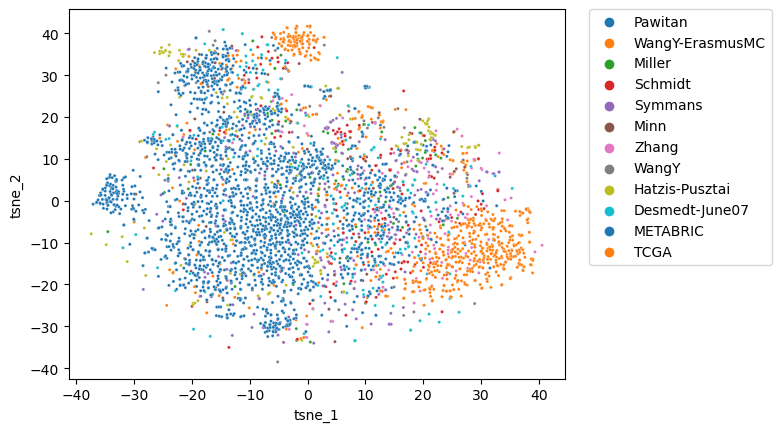

In [8]:
buc_all_2d_df = pd.DataFrame({'tsne_1': buc_all_2d[:,0], 'tsne_2': buc_all_2d[:,1], 'label':study_name_list})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=buc_all_2d_df, s=5, palette='tab10', ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()
fig.savefig("../data/new0418/tsne_buc_all_0513.png", bbox_inches="tight")

In [25]:
# Run 3
study_name_list_nometab = []
for name in df_buc_filtered_scaled_nometab.columns:
    study_name_list_nometab.append(name.split(';')[-1])
print(len(study_name_list_nometab))

df_buc_filtered_scaled_nometab_T = df_buc_filtered_scaled_nometab.T
print(df_buc_filtered_scaled_nometab_T.shape)



1989
(1989, 11748)


In [26]:
buc_nometab_2d = tsne.fit_transform(df_buc_filtered_scaled_nometab_T)

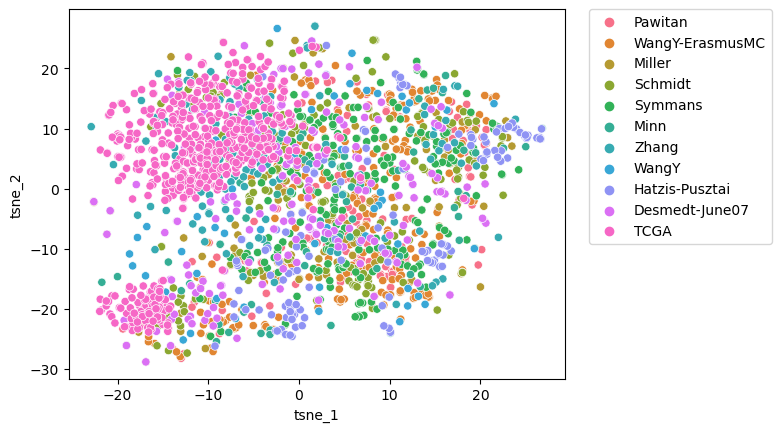

In [27]:
# Run 4
buc_nometab_2d_df = pd.DataFrame({'tsne_1': buc_nometab_2d[:,0], 'tsne_2': buc_nometab_2d[:,1], 'label':study_name_list_nometab})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=buc_nometab_2d_df, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()
# plt.savefig("../data/new0418/tsne_buc_nometab.png", bbox_inches="tight")

In [9]:
study_name_list = []
for name in df_buc_filtered_scaled.columns:
    study_name_list.append(name.split(';')[-1])
print(len(study_name_list))
buc_all_corrected = pycombat(df_buc_filtered_scaled,study_name_list)

3970
Found 12 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [10]:
buc_all_corrected

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.582361,0.219880,0.201526,-0.116395,-0.324742,0.061874,-0.121679,0.052534,-0.126905,0.240381,...,-0.428796,-0.160028,-0.341964,-0.097499,-0.308697,-0.089339,-0.121189,-0.489498,-0.406080,-0.534381
1,-0.222353,-0.176259,-0.542632,-0.441858,-0.293312,-0.329337,-0.152031,-0.387025,0.018033,0.391548,...,-0.376179,-0.434492,-0.388060,-0.764138,-0.397150,0.234654,0.100319,-0.494535,-0.417739,0.268321
2,0.219863,-0.315604,-0.161757,-0.105607,-0.367200,-0.275465,-0.619021,0.115190,-0.199756,-0.352707,...,-0.059009,-0.767852,-0.179631,-0.551553,-0.109096,-0.157337,-0.145270,-0.543611,0.114445,-0.382430
3,0.026182,-0.525516,-0.633541,-0.152048,-0.297712,-0.666713,-0.204282,0.317201,-0.244769,-0.466949,...,-0.218444,-0.053054,-0.312430,-0.418684,-0.133516,0.105114,0.126344,-0.577903,-0.405856,-0.366907
4,-0.288826,-0.012552,-0.418846,-0.533918,-0.430122,-0.372116,-0.077302,-0.105607,-0.347988,-0.279921,...,-0.556641,-0.061238,-0.323369,-0.480254,-0.175460,-0.462905,-0.180611,-0.870457,-0.118729,-0.088296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.153909,-0.157012,-0.338542,-0.821581,-0.320261,-0.249251,-0.185968,-0.033590,0.184181,0.103507,...,-0.245390,-0.557958,0.157371,-0.107451,-0.185898,-0.298547,-0.262995,-0.592960,-0.376282,0.063663
11744,-0.311117,0.263001,0.071561,-0.083216,0.115185,0.103626,-0.040033,-0.222365,-0.019634,0.018034,...,-0.067294,-0.278444,-0.622118,-0.348325,0.031187,-0.458003,-0.262261,-0.314761,-0.116555,-0.267288
11745,-0.320173,-0.633527,-0.367229,-0.231388,-0.377016,-0.771855,-0.171509,-0.052856,0.351235,-0.262310,...,0.250526,-0.428784,-0.409913,-0.382373,-0.488566,-0.273207,0.070956,0.093196,-0.058959,-0.586622
11746,-0.293408,-0.666791,-0.387130,0.153969,-0.542752,-0.430236,-0.534041,-0.311199,0.351214,-0.649435,...,-0.502112,-0.111381,-0.024128,-0.471713,-0.701107,-0.118523,-0.298367,0.030686,-0.439073,-0.067817


In [9]:
buc_all_corrected.T.to_csv('../data/SyNet_bcnew_filtered.csv')

In [12]:
bc_all_2d = tsne.fit_transform(buc_all_corrected.T)

In [17]:
bc_all_2d

array([[ -8.725352  ,  -2.135305  ],
       [-15.206557  , -18.97518   ],
       [-15.375606  , -12.013464  ],
       ...,
       [ 23.54417   , -17.915861  ],
       [  0.52234834, -20.954418  ],
       [-26.153     ,  19.86214   ]], dtype=float32)

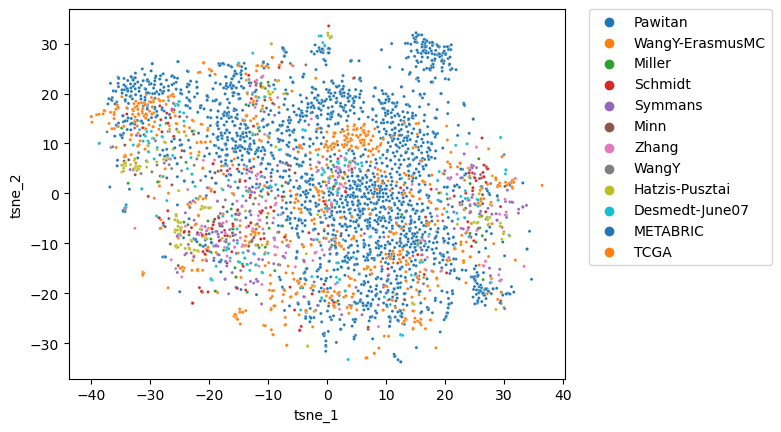

<Figure size 640x480 with 0 Axes>

In [13]:
# Run 1
bc_all_2d_df = pd.DataFrame({'tsne_1': bc_all_2d[:,0], 'tsne_2': bc_all_2d[:,1], 'label':study_name_list})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=bc_all_2d_df, palette='tab10', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()
fig.savefig("../data/new0418/tsne_scaled_bc_all.png", bbox_inches="tight")

In [29]:
df_buc_filtered_scaled_nometab

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.621866,0.301331,0.280210,-0.085645,-0.325406,0.119502,-0.091726,0.108754,-0.097740,0.324923,...,-0.319546,-0.047265,-0.231579,0.016081,-0.197877,0.024348,-0.007919,-0.381042,-0.296533,-0.426511
1,-0.207588,-0.154540,-0.576189,-0.460210,-0.289253,-0.330713,-0.126656,-0.397104,0.069066,0.498933,...,-0.267413,-0.326507,-0.279453,-0.660566,-0.288664,0.351599,0.215465,-0.387353,-0.309529,0.385717
2,0.301331,-0.314907,-0.137853,-0.073233,-0.374286,-0.268714,-0.664092,0.180869,-0.181584,-0.357607,...,0.054353,-0.664024,-0.067891,-0.444816,0.003592,-0.045297,-0.033068,-0.436767,0.230140,-0.273419
3,0.078449,-0.556440,-0.680754,-0.126656,-0.294285,-0.718929,-0.186767,0.413351,-0.233360,-0.489042,...,-0.106646,0.060929,-0.201872,-0.309529,-0.020596,0.221185,0.242696,-0.470851,-0.296533,-0.257069
4,-0.284095,0.033861,-0.433731,-0.566165,-0.446709,-0.379951,-0.040658,-0.073233,-0.352183,-0.273847,...,-0.450313,0.051771,-0.213895,-0.372897,-0.063992,-0.355313,-0.069213,-0.768362,-0.006496,0.024348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.225573,-0.132254,-0.341170,-0.897081,-0.320132,-0.238409,-0.165579,0.009787,0.260412,0.167567,...,-0.134745,-0.451555,0.273481,0.005065,-0.074446,-0.188624,-0.152589,-0.487033,-0.267413,0.178502
11744,-0.309725,0.350977,0.130666,-0.047454,0.180869,0.167567,0.002242,-0.207588,0.025717,0.069066,...,0.046283,-0.167715,-0.516022,-0.238537,0.146093,-0.349694,-0.151313,-0.204520,-0.003643,-0.156408
11745,-0.320132,-0.680754,-0.374286,-0.217953,-0.385550,-0.839949,-0.149041,-0.012490,0.452557,-0.253541,...,0.368008,-0.320455,-0.301329,-0.273419,-0.381042,-0.162782,0.186018,0.208557,0.054353,-0.480419
11746,-0.289253,-0.718929,-0.397104,0.225573,-0.576189,-0.446709,-0.566165,-0.309725,0.452557,-0.698956,...,-0.393770,0.002142,0.090552,-0.362968,-0.595403,-0.005095,-0.187323,0.146093,-0.329895,0.046283


In [30]:
df_buc_filtered_scaled_nometab_corrected = pycombat(df_buc_filtered_scaled_nometab,study_name_list_nometab)

Found 11 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [31]:
df_buc_filtered_scaled_nometab_corrected.T.to_csv('../data/SyNet_bcnew_nometab_filtered.csv')

In [32]:
bc_nometab_2d = tsne.fit_transform(df_buc_filtered_scaled_nometab_corrected.T)

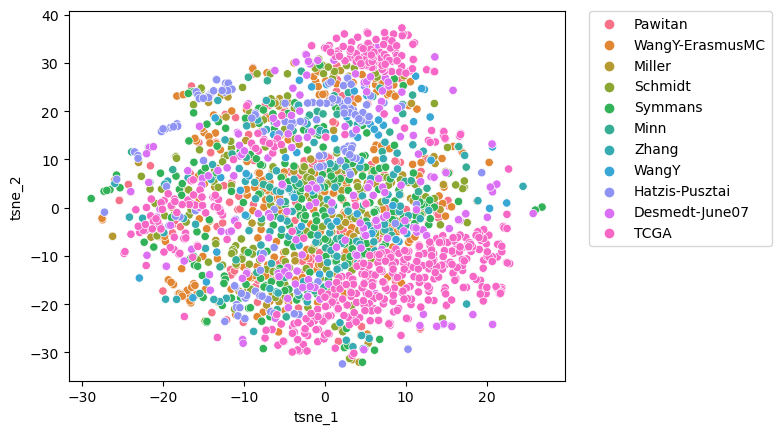

In [33]:
bc_nometab_2d_df = pd.DataFrame({'tsne_1': bc_nometab_2d[:,0], 'tsne_2': bc_nometab_2d[:,1], 'label':study_name_list_nometab})
fig, ax = plt.subplots()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=bc_nometab_2d_df, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.0)
plt.show()

In [40]:
df = pd.read_csv('../data/Survival_labels.csv', index_col=[0], header=[0])
print(df.shape)
df_filtered = df.drop([idx for idx in df.index if 'Loi' in idx or 'Ivshina' in idx], axis=0)
print(df_filtered.shape)

(4129, 1)
(3970, 1)


In [41]:
df_filtered

,Surv_label
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1
TCGA-E2-A109-01;TCGA,0


Below is old

In [ ]:
df = pd.read_csv("../data/SyNet_Normalized_Expression_Batchcorrected_Labeled_Filtered_Data_Only.csv", index_col=[0])


In [4]:
df_bc = df.iloc[:-1, :]
df_bc

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,3.629049,5.280801,5.242942,4.587148,4.157379,4.954873,4.576248,4.935607,4.565468,5.323089,...,3.935817,4.612530,4.115938,4.623928,4.185827,4.639975,4.573905,3.810780,3.982940,3.717678
1,4.332263,4.463688,3.707902,3.915789,4.222221,4.147906,4.513669,4.028902,4.864491,5.635009,...,4.050414,4.080384,4.025762,3.235018,3.996486,5.317841,5.039106,3.794421,3.964181,5.377281
2,5.242035,4.169501,4.486855,4.602680,4.063071,4.252299,3.543621,5.058134,4.408471,4.092966,...,4.705576,3.424029,4.455273,3.674315,4.592464,4.501536,4.526575,3.690796,5.065513,4.025264
3,4.884504,3.731322,3.508488,4.501715,4.201238,3.440060,4.393966,5.469683,4.310448,3.852134,...,4.364457,4.814460,4.169469,3.953367,4.544988,5.035724,5.079771,3.623044,3.975642,4.060785
4,4.219822,4.804504,3.966309,3.728912,3.943046,4.062714,4.670924,4.612529,4.112489,4.252914,...,3.672407,4.808408,4.156502,3.826710,4.459230,3.866932,4.452758,3.016945,4.581178,4.640118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,5.114423,4.500965,4.126470,3.129959,4.164182,4.310675,4.441228,4.755584,5.204846,5.038416,...,4.319781,3.836282,5.155671,4.598045,4.435237,4.209458,4.283245,3.590420,4.048129,4.953176
11744,4.181805,5.370797,4.975893,4.656618,5.065881,5.042039,4.745696,4.369580,4.787775,4.865477,...,4.686425,4.381142,3.535047,4.101880,4.889450,3.875621,4.281827,4.171533,4.584197,4.270049
11745,4.164249,3.530899,4.080236,4.360459,4.060047,3.245546,4.483982,4.728747,5.562333,4.296670,...,5.350998,4.091562,3.980439,4.033849,3.813475,4.264133,4.978350,5.020761,4.708747,3.609987
11746,4.194224,3.458629,4.035481,5.151594,3.714482,3.946568,3.732450,4.192103,5.558449,3.494430,...,3.793907,4.718094,4.785552,3.847064,3.371154,4.589717,4.216605,4.889360,3.924691,4.685001


In [22]:
df_buc = pd.read_csv('../data/SyNet_Normalized_Expression_Par_Labeled_Data_Only.csv', index_col=[0], header=[0])
df_buc

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.50715,0.60264,0.57725,0.13745,-0.15077,0.38406,0.13014,0.37114,0.12291,0.63100,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
100,-0.00914,0.05463,-0.45224,-0.31282,-0.10731,-0.15715,0.08815,-0.23696,0.32343,0.84018,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
1000,0.60264,-0.13815,0.07469,0.15237,-0.20953,-0.08262,-0.55791,0.45783,0.02212,-0.18948,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
10000,0.33471,-0.42850,-0.57794,0.08815,-0.11336,-0.62383,0.01589,0.73730,-0.04012,-0.34748,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
10001,-0.10111,0.28111,-0.28099,-0.44019,-0.29659,-0.21634,0.19153,0.15237,-0.18296,-0.08879,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.51157,0.08142,-0.16972,-0.83799,-0.14443,-0.04619,0.04136,0.25217,0.55345,0.44184,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
9992,-0.13192,0.66232,0.39748,0.18336,0.45783,0.44184,0.24310,-0.00914,0.27132,0.32343,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
9993,-0.14443,-0.57794,-0.20953,-0.02160,-0.22307,-0.76931,0.06124,0.22539,0.78443,-0.06438,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
9994,-0.10731,-0.62383,-0.23696,0.51157,-0.45224,-0.29659,-0.44019,-0.13192,0.78443,-0.59982,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


In [23]:
check_metabric = df_buc.loc[:,df_buc.columns.str.contains("METABRIC")]
check_metabric

,MB-0000;METABRIC,MB-0002;METABRIC,MB-0005;METABRIC,MB-0006;METABRIC,MB-0008;METABRIC,MB-0010;METABRIC,MB-0014;METABRIC,MB-0020;METABRIC,MB-0022;METABRIC,MB-0025;METABRIC,...,MB-7289;METABRIC,MB-7291;METABRIC,MB-7292;METABRIC,MB-7293;METABRIC,MB-7294;METABRIC,MB-7295;METABRIC,MB-7296;METABRIC,MB-7297;METABRIC,MB-7298;METABRIC,MB-7299;METABRIC
10,7.21132,7.38450,8.55640,6.31116,7.65408,7.82206,8.41503,7.05175,6.29240,8.14256,...,6.81588,6.99399,7.26423,7.47107,6.80961,7.02340,7.06691,7.67076,7.96374,7.64061
100,7.21626,6.89431,7.31804,7.07460,7.01010,6.83112,7.15333,7.92821,7.60320,8.11765,...,7.56312,7.75893,7.53598,7.58381,7.76809,7.39987,7.28535,7.84458,7.37353,7.64479
1000,6.68911,7.50078,7.84896,7.84170,6.88782,7.53139,7.18329,7.13048,7.13917,7.42162,...,7.44619,7.25197,7.81536,7.28044,6.70920,7.57371,7.41397,7.26472,7.31653,7.47521
10000,7.46166,7.67895,7.26423,7.82893,7.27306,7.78843,7.60320,7.59195,7.87489,6.68911,...,7.58306,6.93182,7.38450,7.25296,7.10352,7.51396,7.47758,7.00825,7.03513,7.26079
10001,7.10615,7.34422,7.46166,7.63318,7.16691,7.31904,7.39560,7.23725,7.16542,7.51459,...,7.39187,7.56592,7.71722,7.84896,8.06976,6.74044,7.01677,8.06108,7.08383,6.72313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,6.67642,7.75557,7.00581,7.34217,7.59569,7.87647,7.80232,7.53336,7.48662,7.23725,...,7.16441,7.27945,7.15434,7.08974,6.75536,7.52162,7.24266,7.73063,7.30261,7.76007
9992,7.03163,7.28832,7.51079,6.82408,9.07220,7.23238,6.82914,7.13763,7.42326,7.12225,...,6.75665,7.09136,6.62110,7.29274,6.78032,7.22652,6.87690,7.17932,7.37040,8.05544
9993,7.57016,7.93762,7.43940,8.17809,7.08921,7.42052,7.33256,7.72852,6.81691,7.11086,...,7.15283,6.66485,6.88782,7.29569,7.35137,6.53198,6.85939,6.62350,6.89431,7.18329
9994,7.29078,7.23044,7.13406,7.18477,7.26766,7.25883,8.35638,7.67436,7.51332,7.28339,...,7.50453,7.29819,7.24315,7.89957,7.39560,6.68372,7.64144,6.95722,7.39029,7.21775


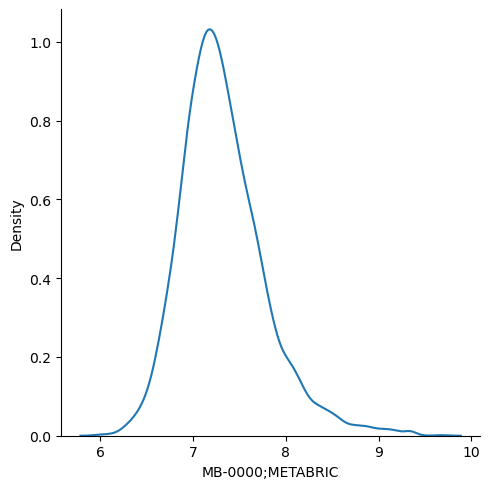

In [24]:
data_metabric = check_metabric.iloc[:, 0]
sns.displot(data_metabric, kind="kde")

In [26]:
check_tcga = df_buc.loc[:,df_buc.columns.str.contains("TCGA")]
check_tcga

,TCGA-A8-A0A7-01;TCGA,TCGA-A8-A07G-01;TCGA,TCGA-A8-A08R-01;TCGA,TCGA-A8-A06Y-01;TCGA,TCGA-A8-A08B-01;TCGA,TCGA-A2-A04T-01;TCGA,TCGA-A2-A0EQ-01;TCGA,TCGA-A2-A0CQ-01;TCGA,TCGA-BH-A0EB-01;TCGA,TCGA-A2-A04P-01;TCGA,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
10,-0.33095,0.19175,-0.90198,0.13580,0.67684,-0.67064,0.21537,0.27114,0.28193,-0.83246,...,-0.53395,0.25359,-0.32433,0.26583,-0.24402,0.28553,0.20864,-0.68049,-0.47911,-0.78884
100,0.68295,-0.18485,-0.44205,-0.09056,0.27833,0.07819,0.48324,-0.59263,-0.25672,0.42619,...,-0.40972,-0.37484,-0.43841,-1.34658,-0.46036,1.06535,0.74095,-0.69553,-0.51008,1.14665
1000,-0.31128,0.55026,-0.52194,-0.58404,-0.15430,1.04073,0.79076,-0.60579,-0.11168,1.00660,...,0.35703,-1.13442,0.06573,-0.83246,0.23607,0.11957,0.14871,-0.81328,0.77592,-0.42403
10000,0.45201,0.43897,2.25857,-0.66581,-0.95774,0.95364,-0.09358,-0.60135,0.60238,0.02235,...,-0.02662,0.49708,-0.25354,-0.51008,0.17843,0.75458,0.80584,-0.89450,-0.47911,-0.38507
10001,0.41351,-1.10908,0.11957,-0.06619,0.80584,0.10996,-0.58404,-0.41684,-0.04795,-1.54958,...,-0.84556,0.47647,-0.28219,-0.66108,0.07502,-0.61918,0.06258,-1.60345,0.21203,0.28553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,-0.09665,-0.84556,2.61045,0.69550,-0.03277,1.24524,1.30403,-0.03887,0.01313,0.40507,...,-0.09358,-0.65626,0.87920,0.23958,0.05011,-0.22197,-0.13610,-0.93306,-0.40972,0.65287
9992,0.78331,0.64134,-0.69553,-0.36122,-0.72671,0.80584,0.48780,-1.02140,-0.35783,0.03164,...,0.33780,-0.01748,-1.00214,-0.34091,0.57564,-0.60579,-0.13306,-0.25985,0.21883,-0.14520
9993,-0.24402,0.40507,-1.37254,-1.03135,0.30021,0.07190,-0.64683,0.08928,-0.56273,0.76164,...,1.10445,-0.36122,-0.49054,-0.42403,-0.68049,-0.16039,0.67078,0.72449,0.35703,-0.91730
9994,-1.10908,-0.82599,0.30387,-0.18796,0.90608,2.61045,0.79076,-1.40092,-0.29184,0.47872,...,-0.71082,0.36478,0.44329,-0.63742,-1.19130,0.21537,-0.21887,0.57564,-0.55861,0.33780


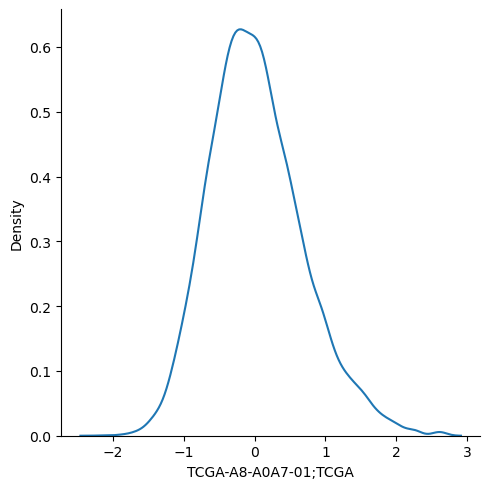

In [27]:
data_tcga = check_tcga.iloc[:, 0]
sns.displot(data_tcga, kind="kde")

In [5]:
df_bc_T = df_bc.T

In [8]:
df_bc_T.columns = df_bc_T.columns.astype(str)
df_bc_T

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM107072;Pawitan,3.629049,4.332263,5.242035,4.884504,4.219822,4.509033,4.348685,4.136162,4.211880,5.083470,...,4.364561,4.268632,4.725725,4.913044,4.312997,5.114423,4.181805,4.164249,4.194224,4.762019
GSM107073;Pawitan,5.280801,4.463688,4.169501,3.731322,4.804504,4.094147,3.744131,4.023317,4.996263,4.613064,...,3.624130,3.668400,3.700765,5.276134,4.640439,4.500965,5.370797,3.530899,3.458629,6.531339
GSM107074;Pawitan,5.242942,3.707902,4.486855,3.508488,3.966309,4.816731,3.452848,4.892969,4.955476,4.372226,...,4.542556,2.947763,5.033894,4.401167,4.951779,4.126470,4.975893,4.080236,4.035481,3.983910
GSM107075;Pawitan,4.587148,3.915789,4.602680,4.501715,3.728912,5.101369,4.454705,5.733619,3.577702,3.491428,...,4.136668,4.340441,4.052506,4.539640,4.163752,3.129959,4.656618,4.360459,5.151594,4.087891
GSM107076;Pawitan,4.157379,4.222221,4.063071,4.201238,3.943046,4.353318,4.621604,4.592652,4.295751,4.216818,...,4.481685,4.443478,4.342876,3.910991,4.490480,4.164182,5.065881,4.060047,3.714482,4.630151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,4.639975,5.317841,4.501536,5.035724,3.866932,4.186158,5.461716,5.152850,3.940720,5.500393,...,4.521970,4.948575,3.997965,3.898589,5.055530,4.209458,3.875621,4.264133,4.589717,4.055908
TCGA-BH-A0B2-01;TCGA,4.573905,5.039106,4.526575,5.079771,4.452758,4.192912,5.139907,4.730859,3.750266,4.550624,...,4.290181,4.574736,4.276593,3.398584,4.377299,4.283245,4.281827,4.978350,4.216605,4.672804
TCGA-AO-A12B-01;TCGA,3.810780,3.794421,3.690796,3.623044,3.016945,4.621034,5.038800,3.515753,4.656313,4.926070,...,4.988369,4.404076,3.588396,4.573813,3.489220,3.590420,4.171533,5.020761,4.889360,5.377599
TCGA-E2-A109-01;TCGA,3.982940,3.964181,5.065513,3.975642,4.581178,4.652957,4.545026,4.263747,4.670502,4.547814,...,4.818532,3.840754,3.857569,5.884538,3.408843,4.048129,4.584197,4.708747,3.924691,4.746932


In [11]:
from sklearn.preprocessing import MinMaxScaler
# axis = 0 --> column wise
scaler = MinMaxScaler(feature_range=(-1, 1))
bc_scaled = scaler.fit_transform(df_bc_T)
bc_scaled

array([[-0.57130444, -0.29731832,  0.05747437, ..., -0.36149805,
        -0.35390761, -0.13095733],
       [ 0.07656748, -0.24550429, -0.36189234, ..., -0.60980035,
        -0.64230233,  0.56269783],
       [ 0.06171775, -0.54347289, -0.23780513, ..., -0.3944348 ,
        -0.41614388, -0.43601198],
       ...,
       [-0.5000233 , -0.50936287, -0.54906887, ..., -0.02570575,
        -0.08137495,  0.11037844],
       [-0.43249657, -0.44243469, -0.01154664, ..., -0.14802937,
        -0.45957988, -0.13687218],
       [-0.53654111,  0.11467984, -0.41828994, ..., -0.57879425,
        -0.16149524,  0.20345523]])

In [12]:
bc_scaled = pd.DataFrame(bc_scaled, index=df_bc_T.index.values.tolist())
bc_scaled

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM107072;Pawitan,-0.571304,-0.297318,0.057474,-0.078583,-0.341280,-0.224128,-0.288004,-0.373911,-0.336780,-0.001977,...,-0.280410,-0.320861,-0.140666,-0.068462,-0.303832,0.010675,-0.353495,-0.361498,-0.353908,-0.130957
GSM107073;Pawitan,0.076567,-0.245504,-0.361892,-0.530701,-0.112061,-0.386803,-0.524422,-0.418111,-0.029254,-0.186399,...,-0.570680,-0.556541,-0.542509,0.073497,-0.175332,-0.230885,0.112650,-0.609800,-0.642302,0.562698
GSM107074;Pawitan,0.061718,-0.543473,-0.237805,-0.618066,-0.440667,-0.103481,-0.638332,-0.077483,-0.045245,-0.280819,...,-0.210630,-0.839498,-0.019846,-0.268594,-0.053151,-0.378349,-0.042172,-0.394435,-0.416144,-0.436012
GSM107075;Pawitan,-0.195506,-0.461513,-0.192517,-0.228659,-0.533736,0.008124,-0.246544,0.251784,-0.585417,-0.626134,...,-0.369750,-0.292665,-0.404606,-0.214454,-0.362401,-0.770741,-0.167344,-0.284574,0.021436,-0.395247
GSM107076;Pawitan,-0.364076,-0.340702,-0.403507,-0.346465,-0.449787,-0.285183,-0.181276,-0.195112,-0.303897,-0.341746,...,-0.234493,-0.252207,-0.290765,-0.460240,-0.234181,-0.363499,-0.006893,-0.402350,-0.541993,-0.182656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,-0.174786,0.091246,-0.232065,-0.019295,-0.479627,-0.350726,0.147260,0.024307,-0.443091,0.161477,...,-0.218701,-0.053882,-0.425989,-0.465089,-0.012435,-0.345670,-0.473534,-0.322339,-0.198852,-0.407785
TCGA-BH-A0B2-01;TCGA,-0.200700,-0.018645,-0.222275,-0.002026,-0.249959,-0.348078,0.021413,-0.140979,-0.517761,-0.210878,...,-0.309569,-0.200669,-0.316751,-0.660579,-0.278598,-0.316616,-0.314281,-0.042333,-0.345133,-0.165934
TCGA-AO-A12B-01;TCGA,-0.500023,-0.509363,-0.549069,-0.573153,-0.812855,-0.180213,-0.018126,-0.616914,-0.162535,-0.063685,...,-0.035858,-0.267679,-0.586563,-0.201093,-0.627111,-0.589427,-0.357522,-0.025706,-0.081375,0.110378
TCGA-E2-A109-01;TCGA,-0.432497,-0.442435,-0.011547,-0.434912,-0.199613,-0.167696,-0.211223,-0.323938,-0.156972,-0.211980,...,-0.102440,-0.488866,-0.481032,0.311368,-0.658654,-0.409197,-0.195737,-0.148029,-0.459580,-0.136872


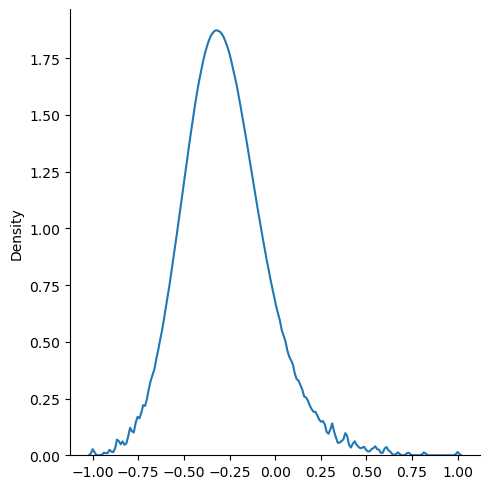

In [13]:
import seaborn as sns

data_bc_feature_scaled = bc_scaled.to_numpy().flatten()
sns.displot(data_bc_feature_scaled, kind="kde")

In [16]:
bc_scaled.to_csv('../data/SyNet_Labeled_Filtered_bc_feature-scaled.csv')

Below is old

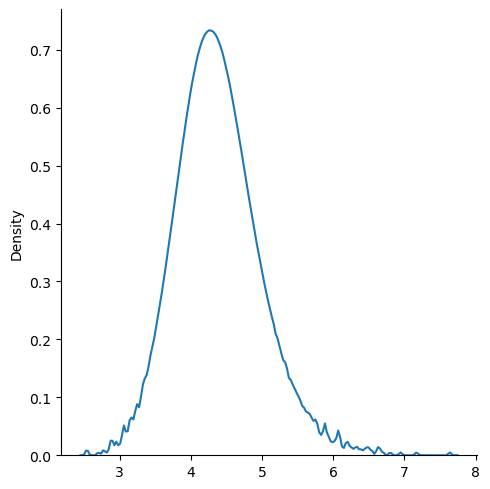

In [8]:
import seaborn as sns

data = df_bc.to_numpy().flatten()
sns.displot(data, kind="kde")

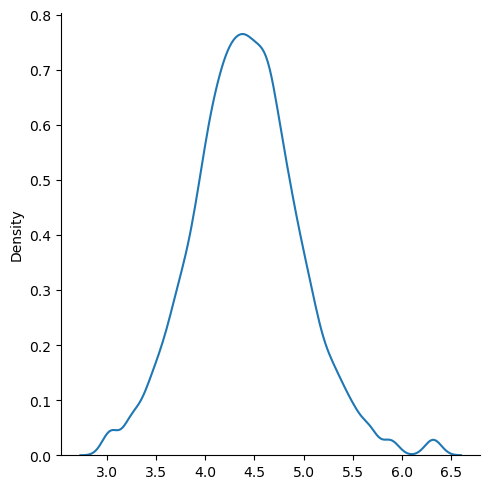

In [15]:
Pawitan1 = df_bc.iloc[:, 500].to_numpy()
sns.displot(Pawitan1, kind="kde")

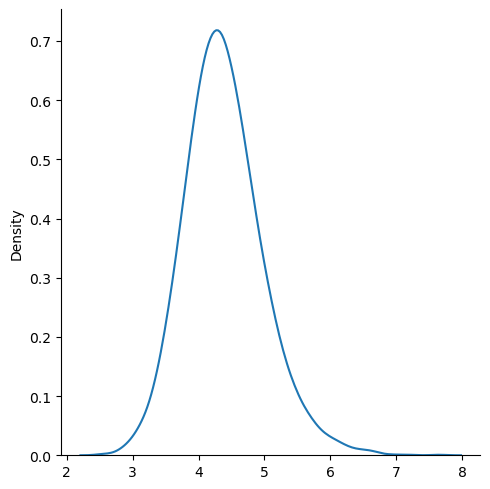

In [12]:
gene0 = df_bc.iloc[9797, :].to_numpy()
sns.displot(gene0, kind="kde")

In [39]:
df_bc_filtered = df_bc.drop([col for col in df_bc.columns if 'Loi' in col or 'Ivshina' in col], axis=1)
df_bc_filtered

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,3.629049,5.280801,5.242942,4.587148,4.157379,4.954873,4.576248,4.935607,4.565468,5.323089,...,3.935817,4.612530,4.115938,4.623928,4.185827,4.639975,4.573905,3.810780,3.982940,3.717678
1,4.332263,4.463688,3.707902,3.915789,4.222221,4.147906,4.513669,4.028902,4.864491,5.635009,...,4.050414,4.080384,4.025762,3.235018,3.996486,5.317841,5.039106,3.794421,3.964181,5.377281
2,5.242035,4.169501,4.486855,4.602680,4.063071,4.252299,3.543621,5.058134,4.408471,4.092966,...,4.705576,3.424029,4.455273,3.674315,4.592464,4.501536,4.526575,3.690796,5.065513,4.025264
3,4.884504,3.731322,3.508488,4.501715,4.201238,3.440060,4.393966,5.469683,4.310448,3.852134,...,4.364457,4.814460,4.169469,3.953367,4.544988,5.035724,5.079771,3.623044,3.975642,4.060785
4,4.219822,4.804504,3.966309,3.728912,3.943046,4.062714,4.670924,4.612529,4.112489,4.252914,...,3.672407,4.808408,4.156502,3.826710,4.459230,3.866932,4.452758,3.016945,4.581178,4.640118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,5.114423,4.500965,4.126470,3.129959,4.164182,4.310675,4.441228,4.755584,5.204846,5.038416,...,4.319781,3.836282,5.155671,4.598045,4.435237,4.209458,4.283245,3.590420,4.048129,4.953176
11744,4.181805,5.370797,4.975893,4.656618,5.065881,5.042039,4.745696,4.369580,4.787775,4.865477,...,4.686425,4.381142,3.535047,4.101880,4.889450,3.875621,4.281827,4.171533,4.584197,4.270049
11745,4.164249,3.530899,4.080236,4.360459,4.060047,3.245546,4.483982,4.728747,5.562333,4.296670,...,5.350998,4.091562,3.980439,4.033849,3.813475,4.264133,4.978350,5.020761,4.708747,3.609987
11746,4.194224,3.458629,4.035481,5.151594,3.714482,3.946568,3.732450,4.192103,5.558449,3.494430,...,3.793907,4.718094,4.785552,3.847064,3.371154,4.589717,4.216605,4.889360,3.924691,4.685001


In [40]:
from sklearn.preprocessing import MinMaxScaler
# axis = 0 --> column wise
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(df_bc_filtered)
scaled

array([[-0.60251665,  0.30339016,  0.28033907, ..., -0.37786997,
        -0.2982342 , -0.42050508],
       [-0.21714469, -0.14626653, -0.56461446, ..., -0.38583091,
        -0.30740355,  0.38552677],
       [ 0.2814234 , -0.30815687, -0.1358441 , ..., -0.43625668,
         0.23093531, -0.27111731],
       ...,
       [-0.30921923, -0.65957925, -0.35966525, ...,  0.21093143,
         0.05654576, -0.47280828],
       [-0.29279227, -0.69934924, -0.38430053, ...,  0.14698923,
        -0.32670686,  0.04930219],
       [ 0.01836773,  0.99156014, -0.41268744, ...,  0.38457623,
         0.07521055,  0.50098755]])

In [41]:
scaled.shape

(11748, 3970)

In [43]:
df_bc_filtered_scaled = pd.DataFrame(scaled, columns=df_bc_filtered.columns.values.tolist())
df_bc_filtered_scaled

,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,-0.602517,0.303390,0.280339,-0.086415,-0.322869,0.126771,-0.091352,0.107752,-0.082449,0.322607,...,-0.317295,-0.048110,-0.229663,0.016557,-0.194489,0.025287,-0.011613,-0.377870,-0.298234,-0.420505
1,-0.217145,-0.146267,-0.564614,-0.459489,-0.286967,-0.315434,-0.126206,-0.394236,0.081163,0.494768,...,-0.261529,-0.323351,-0.273472,-0.659981,-0.286666,0.356513,0.215292,-0.385831,-0.307404,0.385527
2,0.281423,-0.308157,-0.135844,-0.077784,-0.375086,-0.258228,-0.666464,0.175588,-0.168351,-0.356349,...,0.057296,-0.662836,-0.064809,-0.445999,0.003476,-0.042358,-0.034698,-0.436257,0.230935,-0.271117
3,0.085491,-0.549286,-0.674381,-0.133890,-0.298586,-0.703321,-0.192873,0.403438,-0.221985,-0.489274,...,-0.108704,0.056334,-0.203657,-0.310073,-0.019637,0.218662,0.235126,-0.469226,-0.301801,-0.253865
4,-0.278764,0.041284,-0.422376,-0.563336,-0.441541,-0.362118,-0.038624,-0.071117,-0.330299,-0.268066,...,-0.445480,0.053204,-0.209956,-0.371768,-0.061387,-0.352445,-0.070703,-0.764166,-0.005811,0.027504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.211490,-0.125753,-0.334216,-0.896174,-0.319103,-0.226239,-0.166551,0.008084,0.267391,0.165484,...,-0.130445,-0.449607,0.275455,0.003949,-0.073068,-0.185076,-0.153384,-0.485102,-0.266369,0.179549
11744,-0.299598,0.352915,0.133344,-0.047811,0.180149,0.174536,0.003020,-0.205623,0.039188,0.070032,...,0.047977,-0.167790,-0.511869,-0.237732,0.148058,-0.348199,-0.154076,-0.202320,-0.004335,-0.152231
11745,-0.309219,-0.659579,-0.359665,-0.212386,-0.376760,-0.809912,-0.142739,-0.006774,0.462992,-0.243916,...,0.371381,-0.317569,-0.295491,-0.270871,-0.375762,-0.158360,0.185658,0.210931,0.056546,-0.472808
11746,-0.292792,-0.699349,-0.384301,0.227248,-0.568092,-0.425763,-0.561297,-0.303881,0.460866,-0.686705,...,-0.386354,0.006491,0.095646,-0.361854,-0.591099,0.000730,-0.185888,0.146989,-0.326707,0.049302


In [53]:
data_processed = df_bc_filtered_scaled.to_numpy().flatten()
sns.displot(data_processed, kind="kde")

MemoryError: 

In [46]:
# Check the maximum sum of values per sample
s = df_bc_filtered_scaled.sum().to_list()

print(max(s))
print(s.index(max(s)))

-90.74250572743904
3866


In [47]:
# Check the maximum sum of values per gene
s_row = df_bc_filtered_scaled.sum(axis=1).to_list()
print(len(s_row))
print(max(s_row))
print(s_row.index(max(s_row)))

11748
-827.1438280648882
6921


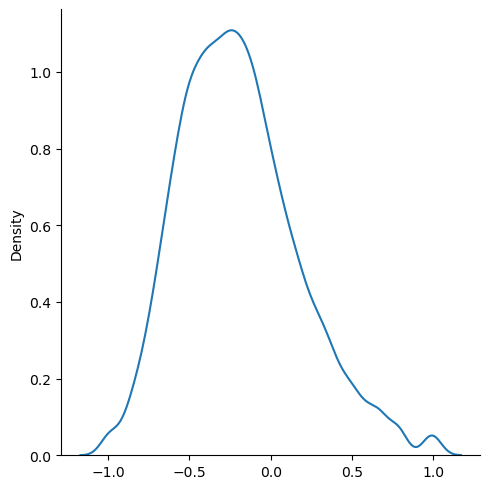

In [49]:
# Check distribution of gene values in a sample
sample = df_bc_filtered_scaled.iloc[:, 500].to_numpy()
sns.displot(sample, kind="kde")

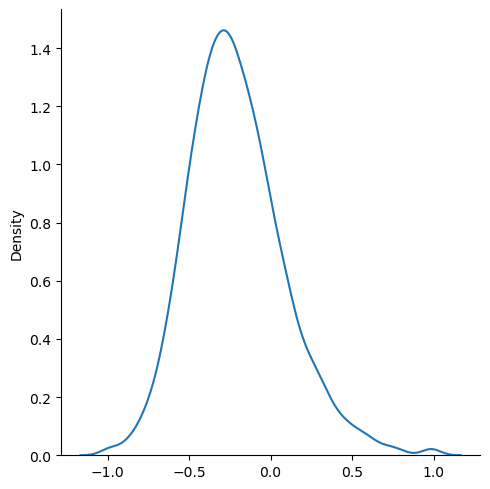

In [50]:
# Check distribution of gene values in a gene
gene = df_bc_filtered_scaled.iloc[1999, :].to_numpy()
sns.displot(gene, kind="kde")

In [51]:
df_bc_filtered_scaled_T = df_bc_filtered_scaled.T
df_bc_filtered_scaled_T

,0,1,2,3,4,5,6,7,8,9,...,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747
GSM107072;Pawitan,-0.602517,-0.217145,0.281423,0.085491,-0.278764,-0.120272,-0.208145,-0.324611,-0.283117,0.194528,...,-0.199445,-0.252016,-0.001522,0.101132,-0.227703,0.211490,-0.299598,-0.309219,-0.292792,0.018368
GSM107073;Pawitan,0.303390,-0.146267,-0.308157,-0.549286,0.041284,-0.349625,-0.542238,-0.388602,0.146809,-0.064065,...,-0.608274,-0.583912,-0.566102,0.300822,-0.049000,-0.125753,0.352915,-0.659579,-0.699349,0.991560
GSM107074;Pawitan,0.280339,-0.564614,-0.135844,-0.674381,-0.422376,0.045734,-0.705008,0.087699,0.122105,-0.198941,...,-0.105184,-0.983028,0.165270,-0.183011,0.120070,-0.334216,0.133344,-0.359665,-0.384301,-0.412687
GSM107075;Pawitan,-0.086415,-0.459489,-0.077784,-0.133890,-0.563336,0.199338,-0.160014,0.550678,-0.647363,-0.695306,...,-0.336746,-0.223510,-0.383515,-0.112815,-0.321696,-0.896174,-0.047811,-0.212386,0.227248,-0.363852
GSM107076;Pawitan,-0.322869,-0.286967,-0.375086,-0.298586,-0.441541,-0.214382,-0.065838,-0.081867,-0.246255,-0.289959,...,-0.143308,-0.164462,-0.220164,-0.459289,-0.138438,-0.319103,0.180149,-0.376760,-0.568092,-0.061105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,0.025287,0.356513,-0.042358,0.218662,-0.352445,-0.196461,0.426815,0.275894,-0.316390,0.445714,...,-0.032373,0.176079,-0.288418,-0.336976,0.228340,-0.185076,-0.348199,-0.158360,0.000730,-0.260105
TCGA-BH-A0B2-01;TCGA,-0.011613,0.215292,-0.034698,0.235126,-0.070703,-0.197445,0.264458,0.064942,-0.413348,-0.022968,...,-0.150001,-0.011208,-0.156629,-0.584883,-0.107509,-0.153384,-0.154076,0.185658,-0.185888,0.036626
TCGA-AO-A12B-01;TCGA,-0.377870,-0.385831,-0.436257,-0.469226,-0.764166,0.016416,0.219710,-0.521436,0.033584,0.164853,...,0.195169,-0.089160,-0.486087,-0.006563,-0.534348,-0.485102,-0.202320,0.210931,0.146989,0.384576
TCGA-E2-A109-01;TCGA,-0.298234,-0.307404,0.230935,-0.301801,-0.005811,0.029275,-0.023483,-0.160973,0.037851,-0.022120,...,0.110209,-0.367736,-0.359516,0.631281,-0.578857,-0.266369,-0.004335,0.056546,-0.326707,0.075211


In [52]:
df_bc_filtered_scaled_T.to_csv("../data/SyNet_bc_filtered_scaled.csv")

Below are old stuff

In [10]:
df_patient_info = pandas.read_csv("/hpc/compgen/projects/cancer_gene_expression_representation_learning/raw/SyNetData/Patient_information.csv")
# print(df_patient_info.head())
list(df_patient_info.loc[df_patient_info['StudyName'] == 'Zhang'].SurvivalTime)

[2086.0,
 1925.0,
 1864.0,
 2034.0,
 1919.0,
 1843.0,
 1931.0,
 1952.0,
 1879.0,
 1356.0,
 1925.0,
 2071.0,
 2065.0,
 2518.0,
 2004.0,
 2402.0,
 1873.0,
 2561.0,
 3342.0,
 1974.0,
 2043.0,
 3789.0,
 3738.0,
 231.0,
 3637.0,
 3598.0,
 1888.0,
 3543.0,
 1882.0,
 1095.0,
 2451.0,
 3078.0,
 2348.0,
 3339.0,
 2308.0,
 2883.0,
 2774.0,
 2536.0,
 2649.0,
 2603.0,
 3309.0,
 894.0,
 3135.0,
 3111.0,
 2825.0,
 3166.0,
 2996.0,
 4224.0,
 3902.0,
 3321.0,
 3470.0,
 4684.0,
 4529.0,
 885.0,
 2378.0,
 3166.0,
 1901.0,
 2317.0,
 5858.0,
 3303.0,
 5836.0,
 4243.0,
 1891.0,
 3285.0,
 4997.0,
 4592.0,
 2974.0,
 1441.0,
 3945.0,
 3534.0,
 3966.0,
 2104.0,
 5818.0,
 1828.0,
 5392.0,
 1161.0,
 1882.0,
 2792.0,
 4891.0,
 4024.0,
 4951.0,
 4307.0,
 4124.0,
 5538.0,
 5362.0,
 3212.0,
 3431.0,
 2941.0,
 3142.0,
 3044.0,
 1919.0,
 3537.0,
 3062.0,
 3163.0,
 401.0,
 4973.0,
 2509.0,
 1849.0,
 2725.0,
 2536.0,
 2840.0,
 456.0,
 1904.0,
 2539.0,
 2551.0,
 2509.0,
 2743.0,
 2415.0,
 1882.0,
 2266.0,
 1919.0,
 2561.

In [14]:
df_count_study = df_patient_info.loc[:, ['StudyName']].value_counts().reset_index()
df_count_study.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/StudyNameCount.csv")

In [2]:
df_surv_labeled = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index_col=0)
df_T = df_surv_labeled.T



In [7]:
# Make filtered gene_exp + survival dataset without Loi and Ivshina
print(df_T.head())
df_filtered = df_T.drop([col for col in df_T.columns if 'Loi' in col or 'Ivshina' in col], axis=1)
print(df_filtered.shape)
df_filtered.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Batchcorrected_Labeled_Filtered_Data_Only.csv")

   GSM107072;Pawitan  GSM107073;Pawitan  GSM107074;Pawitan  GSM107075;Pawitan  \
0           3.629049           5.280801           5.242942           4.587148   
1           4.332263           4.463688           3.707902           3.915789   
2           5.242035           4.169501           4.486855           4.602680   
3           4.884504           3.731322           3.508488           4.501715   
4           4.219822           4.804504           3.966309           3.728912   

   GSM107076;Pawitan  GSM107077;Pawitan  GSM107078;Pawitan  GSM107079;Pawitan  \
0           4.157379           4.954873           4.576248           4.935607   
1           4.222221           4.147906           4.513669           4.028902   
2           4.063071           4.252299           3.543621           5.058134   
3           4.201238           3.440060           4.393966           5.469683   
4           3.943046           4.062714           4.670924           4.612529   

   GSM107080;Pawitan  GSM1

In [17]:
# df_gene_exp_labeled.shape
df_test_gene_exp = df_T.loc[:,[col for col in df_gene_exp_labeled.columns if 'Schmidt' in col or 'WangY-ErasmusMC' in col]]
df_train_gene_exp = df_T.drop([col for col in df_gene_exp_labeled.columns if 'Schmidt' in col or 'WangY-ErasmusMC' in col], axis=1)

# print(df_test_gene_exp.head())
# print(df_train_gene_exp.head())


In [18]:
df_test_data = df_test_gene_exp.T.iloc[:, :-1]
df_test_label = df_test_gene_exp.T.iloc[:, -1]
df_train_data = df_train_gene_exp.T.iloc[:, :-1]
df_train_label = df_train_gene_exp.T.iloc[:, -1]

print(df_test_data.head())
# print(df_test_label.head())

                                 0         1         2         3         4  \
GSM36777;WangY-ErasmusMC  4.479006  4.538666  4.556478  4.714976  4.610552   
GSM36779;WangY-ErasmusMC  4.400295  3.299735  3.897792  3.287660  4.535668   
GSM36780;WangY-ErasmusMC  4.640632  4.202013  4.496096  3.657854  4.242458   
GSM36781;WangY-ErasmusMC  4.588017  3.804802  4.914319  3.926866  4.643802   
GSM36782;WangY-ErasmusMC  4.782092  3.938943  3.434446  5.066493  4.745569   

                                 5         6         7         8         9  \
GSM36777;WangY-ErasmusMC  4.566487  4.423365  4.405725  5.841774  4.693470   
GSM36779;WangY-ErasmusMC  4.363115  4.148425  4.313651  5.702444  4.548144   
GSM36780;WangY-ErasmusMC  4.165044  4.601709  5.149597  5.478764  5.054272   
GSM36781;WangY-ErasmusMC  3.949872  3.770622  5.201658  5.267118  4.344408   
GSM36782;WangY-ErasmusMC  4.572825  4.743210  5.547272  4.202519  5.192734   

                          ...     11738     11739     11740   

In [21]:
print(df_train_data.shape)

(3702, 11748)


In [23]:
df_test_data.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/df_test_data_gene_exp.csv", index=True, header=True)
df_test_label.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/df_test_label_gene_exp.csv", index=True, header=True)
df_train_data.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/df_train_data_gene_exp.csv", index=True, header=True)
df_train_label.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/df_train_label_gene_exp.csv", index=True, header=True)

In [25]:
print(pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/df_test_data_gene_exp.csv"))

                   Unnamed: 0         0         1         2         3  \
0    GSM36777;WangY-ErasmusMC  4.479006  4.538666  4.556478  4.714976   
1    GSM36779;WangY-ErasmusMC  4.400295  3.299735  3.897792  3.287660   
2    GSM36780;WangY-ErasmusMC  4.640632  4.202013  4.496096  3.657854   
3    GSM36781;WangY-ErasmusMC  4.588017  3.804802  4.914319  3.926866   
4    GSM36782;WangY-ErasmusMC  4.782092  3.938943  3.434446  5.066493   
..                        ...       ...       ...       ...       ...   
421         GSM282564;Schmidt  3.927846  4.321619  5.254738  5.051602   
422         GSM282566;Schmidt  3.251527  4.080751  5.193285  4.147511   
423         GSM282567;Schmidt  3.740002  4.771103  3.909987  3.523916   
424         GSM282568;Schmidt  5.107068  4.915380  3.573873  4.494527   
425         GSM282569;Schmidt  3.755048  4.722985  5.427353  6.077226   

            4         5         6         7         8  ...     11738  \
0    4.610552  4.566487  4.423365  4.405725  5.8417